In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
lastDate = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc())
                     .first())
lastDate

('2017-08-23')

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcpLastYear = session.query(Measurement.prcp).\
                    filter(Measurement.date <= '2017-08-23').\
                    order_by(Measurement.date).all()
prcpLastYear

[(0.08),
 (0.28),
 (0.21),
 (0.15),
 (0.15),
 (0.05),
 (0.14),
 (0.0),
 (0.0),
 (0.02),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.02),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (0.02),
 (0.11),
 (0.01),
 (0.08),
 (0.36),
 (0.06),
 (0.38),
 (None),
 (0.7),
 (0.17),
 (0.04),
 (0.3),
 (0.0),
 (0.01),
 (0.03),
 (0.02),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.01),
 (0.03),
 (0.14),
 (0.48),
 (0.03),
 (0.05),
 (0.14),
 (0.0),
 (0.0),
 (0.02),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.02),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 

In [ ]:
# Calculate the date 1 year ago from the last data point in the database
date_query = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("The date calculated:", date_query)

In [26]:
# Perform a query to retrieve the data and precipitation scores
data_prcp_score = session.query(Measurement.date, Measurement.prcp)\
                    .order_by(Measurement.date.desc())\
                    .filter(Measurement.date > date_query).all()
data_prcp_score

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [28]:
# Save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(data_prcp_score)
# Sort the dataframe by date
scores_df = scores_df.sort_values("date")
scores_df = scores_df.dropna()
scores_df.set_index("date", inplace=True)
scores_df.head()

,prcp
date,
2016-08-24,1.45
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.15
2016-08-24,2.28


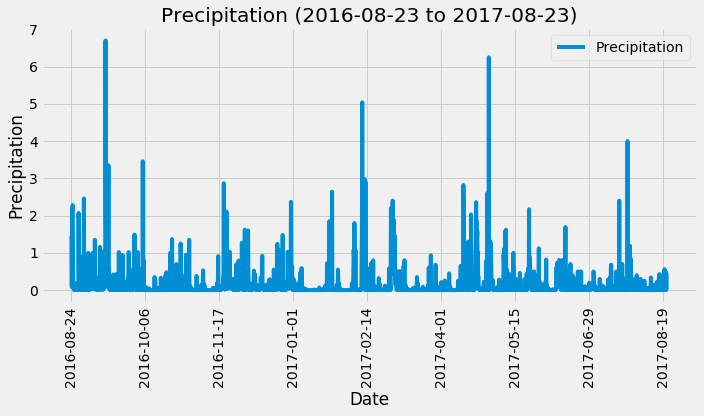

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot(figsize = (10,6))
plt.title("Precipitation (2016-08-23 to 2017-08-23)")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend(["Precipitation"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
scores_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [37]:
# Design a query to show how many stations are available in this dataset?
count_station = session.query(Measurement).group_by(Measurement.station).count()
print(f"The number of stations is {count_station}")

The number of stations is 9


In [43]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_station = session.query(Measurement.station,func.count(Measurement.station)\
                                   ).group_by(Measurement.station\
                                   ).order_by(func.count(Measurement.station\
                                   ).desc()).all()
print(f"The most active station is {most_active_station[0]}")

print("\n")

for station in most_active_station:
    print(f"The Station Number & count {station}")

The most active station is ('USC00519281', 2772)


The Station Number & count ('USC00519281', 2772)
The Station Number & count ('USC00519397', 2724)
The Station Number & count ('USC00513117', 2709)
The Station Number & count ('USC00519523', 2669)
The Station Number & count ('USC00516128', 2612)
The Station Number & count ('USC00514830', 2202)
The Station Number & count ('USC00511918', 1979)
The Station Number & count ('USC00517948', 1372)
The Station Number & count ('USC00518838', 511)


In [73]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(func.min(Measurement.tobs)).\
                        filter(Measurement.station == most_active_station[0][0]).all()
print(f"Station {most_active_station[0][0]} lowest recorded temperature is {lowest_temp[0][0]} F")

high_avg_temp = session.query(Measurement.station,\
                             func.max(Measurement.tobs),\
                             func.avg(Measurement.tobs)).\
                             group_by(Measurement.station).\
                             filter(Measurement.station == most_active_station[0][0]).all()
print(f"Station {most_active_station[0][0]} highest recorded temperature is {high_avg_temp[0][1]} F")
print(f"Station {most_active_station[0][0]} average recorded temperature is {round(high_avg_temp[0][2],2)} F")



Station USC00519281 lowest recorded temperature is 54.0 F
Station USC00519281 highest recorded temperature is 85.0 F
Station USC00519281 average recorded temperature is 71.66 F


In [74]:
# Choose the station with the highest number of temperature observations.
most_temp_observations = session.query(Measurement.station, \
                            func.count(Measurement.tobs)).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.station).desc()).first()

print(f"The station with the most temperature observations is {most_temp_observations[0]}")

The station with the most temperature observations is USC00519281


In [ ]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
